# Import Libraries

In [108]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe
3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


In [109]:
import sklearn
print(sklearn.__version__)
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


1.6.1


In [110]:
pip install kaggle

# Load Data

In [111]:
import os
import zipfile

os.environ['KAGGLE_CONFIG_DIR'] = os.path.abspath('../kaggle')

!kaggle competitions download -c idealize-2025-practice-competition -p ../data/raw/

idealize-2025-practice-competition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
with zipfile.ZipFile('../data/raw/idealize-2025-practice-competition.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/raw/')  

In [113]:
df = pd.read_csv(r"..\Data\raw\train.csv")

# LETS START PREPROCESSING DATA!

## calculating missing 

In [115]:
total = len(df)

percent_missing = (df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': df.columns,
    'missing_percentage': percent_missing.round(2)
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='missing_percentage', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage
Sunshine,Sunshine,47.77%
Evaporation,Evaporation,42.81%
Cloud3pm,Cloud3pm,40.15%
Cloud9am,Cloud9am,37.69%
Pressure9am,Pressure9am,9.92%
Pressure3pm,Pressure3pm,9.9%
WindDir9am,WindDir9am,7.08%
WindGustDir,WindGustDir,6.58%
WindGustSpeed,WindGustSpeed,6.54%
WindDir3pm,WindDir3pm,2.7%


## visually representing Missing values

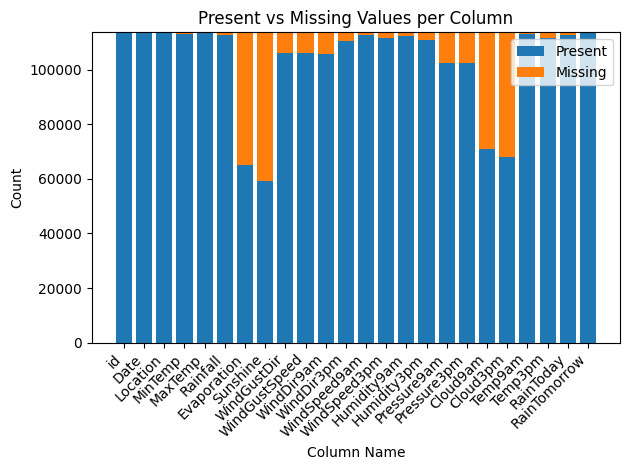

In [116]:
import matplotlib.pyplot as plt

present = df.notnull().sum()
missing = df.isnull().sum()

plt.bar(df.columns, present, label='Present')
plt.bar(df.columns, missing, bottom=present, label='Missing')
plt.xlabel('Column Name')
plt.ylabel('Count')
plt.title('Present vs Missing Values per Column')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## drop colomns

In [117]:
preprocessed_df = df.copy()

In [119]:
cols_to_drop = ['id']
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count / len(df) > 0.35:
        cols_to_drop.append(col)

preprocessed_df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

        

Dropped columns: ['id', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


## thinking what to do with other missing values

In [120]:
total = len(preprocessed_df)

percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2),
    'Data Type': preprocessed_df.dtypes
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='Data Type', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage,Data Type
Date,Date,0.0%,object
RainToday,RainToday,0.99%,object
WindGustDir,WindGustDir,6.58%,object
WindDir9am,WindDir9am,7.08%,object
WindDir3pm,WindDir3pm,2.7%,object
Location,Location,0.0%,object
Humidity3pm,Humidity3pm,2.55%,float64
Temp3pm,Temp3pm,1.94%,float64
Temp9am,Temp9am,0.65%,float64
Pressure3pm,Pressure3pm,9.9%,float64


## handle missing values


In [121]:
for col in preprocessed_df.columns:
    if preprocessed_df[col].dtype in ['int64', 'float64']:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mean())
    else:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mode()[0])


## check after adding missing values

In [122]:
total=len(preprocessed_df)

preprocessed_df.isnull().sum()
percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2).astype(str) + '%'
})

missing_stats

,Column Name,missing_percentage
Date,Date,0.0%
Location,Location,0.0%
MinTemp,MinTemp,0.0%
MaxTemp,MaxTemp,0.0%
Rainfall,Rainfall,0.0%
WindGustDir,WindGustDir,0.0%
WindGustSpeed,WindGustSpeed,0.0%
WindDir9am,WindDir9am,0.0%
WindDir3pm,WindDir3pm,0.0%
WindSpeed9am,WindSpeed9am,0.0%


In [123]:
df.sample(10)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7513,7513,2011-02-08,Woomera,13.1,30.3,21.0,2.2,9.7,E,33.0,...,47.0,28.0,1018.2,1015.8,5.0,2.0,20.1,27.6,Yes,0
54171,54171,2015-02-06,SydneyAirport,18.1,25.8,0.0,4.2,7.8,SSW,31.0,...,74.0,50.0,1027.7,1026.3,7.0,7.0,20.8,24.6,No,0
97537,97537,2016-03-01,BadgerysCreek,17.0,30.6,0.0,NaN,NaN,ENE,26.0,...,100.0,50.0,1022.0,1019.2,NaN,NaN,21.4,28.9,No,0
52780,52780,2009-03-12,Moree,17.6,29.0,0.0,9.8,4.5,E,41.0,...,54.0,34.0,1019.2,1016.8,6.0,8.0,22.8,28.2,No,0
69294,69294,2010-11-23,Albany,13.8,19.6,0.6,1.8,3.8,NaN,NaN,...,67.0,72.0,1019.6,1019.5,7.0,4.0,17.0,19.0,No,0
91174,91174,2014-11-11,Townsville,20.5,30.1,0.0,11.8,11.8,NE,41.0,...,46.0,52.0,1015.7,1012.3,4.0,1.0,27.1,28.2,No,0
8219,8219,2013-04-14,Williamtown,12.3,27.5,0.0,11.2,NaN,NW,28.0,...,75.0,45.0,1014.3,1011.2,3.0,1.0,19.3,25.8,No,0
72071,72071,2014-12-01,Watsonia,21.3,30.0,0.0,13.2,8.9,NNE,43.0,...,53.0,46.0,1005.3,1003.2,7.0,4.0,25.7,28.6,No,0
14637,14637,2010-10-12,MountGambier,15.9,16.6,0.4,8.2,0.0,SSW,37.0,...,81.0,96.0,1020.6,1020.2,8.0,8.0,15.9,13.0,No,1
93134,93134,2017-02-26,Darwin,25.7,33.3,15.4,4.8,9.2,ESE,41.0,...,81.0,62.0,1008.8,1005.7,5.0,6.0,27.3,32.7,Yes,1


## split or join columns

In [124]:
preprocessed_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [125]:
#SPLIT Date INTO sub-columns: Month and Year
preprocessed_df[['Year','Month','Day']] = preprocessed_df['Date'].str.split('-', expand=True)


#drop the original Date column
preprocessed_df = preprocessed_df.drop(['Date'], axis=1)


In [126]:
preprocessed_df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
99187,Darwin,25.4,32.0,0.4,W,46.0,SW,SSW,19.0,15.0,...,93.0,1006.7,1002.7,29.1,25.8,No,1,2011,02,23
106304,Sale,12.5,20.9,0.0,WSW,33.0,WNW,W,6.0,11.0,...,87.0,1018.4,1018.1,17.0,20.5,No,1,2009,03,12
18990,GoldCoast,13.3,24.4,0.0,SSE,33.0,SSE,E,17.0,19.0,...,42.0,1024.3,1021.1,23.2,21.3,No,0,2016,10,15
98962,PerthAirport,6.7,17.2,1.8,NNW,44.0,NE,NNW,15.0,19.0,...,65.0,1019.4,1016.3,11.1,16.4,Yes,1,2009,07,22
15515,Canberra,9.4,24.7,0.0,W,17.0,N,W,6.0,6.0,...,48.0,1027.5,1023.7,14.8,23.0,No,0,2010,04,19


In [127]:
preprocessed_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

## Encoding

*only qualititive data will be encoded*

In [128]:
from sklearn.preprocessing import OneHotEncoder

## getting unique count of coloms to decide encoding techiques

In [129]:

unique_count=pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'Unique Count': [preprocessed_df[col].nunique() for col in preprocessed_df.columns],
    'data_type': [preprocessed_df[col].dtype for col in preprocessed_df.columns]
})


unique_count = unique_count.sort_values(by='data_type', ascending=False)
unique_count

,Column Name,Unique Count,data_type
0,Location,49,object
6,WindDir9am,16,object
19,Month,12,object
18,Year,11,object
16,RainToday,2,object
7,WindDir3pm,16,object
20,Day,31,object
4,WindGustDir,16,object
5,WindGustSpeed,66,float64
8,WindSpeed9am,42,float64


## check what are the unique Values

In [130]:
var = preprocessed_df["Year"].unique()
var = sorted(var)
print(var)

['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


# ML works better with Numbers

### converting some other data types to int

In [131]:
preprocessed_df['Year']=preprocessed_df['Year'].astype(int)
preprocessed_df['Month']=preprocessed_df['Month'].astype(int)


In [132]:
df.sample(10)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7028,7028,2016-07-04,Darwin,20.9,32.0,0.0,6.2,10.8,ESE,35.0,...,59.0,46.0,1015.8,1011.2,0.0,1.0,25.8,30.6,No,0
45217,45217,2017-02-13,MountGambier,12.9,19.8,0.2,NaN,NaN,SW,43.0,...,82.0,65.0,1016.0,1016.5,8.0,8.0,14.7,18.9,No,0
55595,55595,2009-09-09,Canberra,2.1,13.7,2.2,1.8,NaN,NaN,NaN,...,75.0,55.0,NaN,NaN,NaN,NaN,9.7,12.3,Yes,0
19561,19561,2012-06-02,Townsville,19.8,23.8,3.0,3.8,0.0,SW,15.0,...,90.0,80.0,1014.5,1010.9,8.0,7.0,21.1,23.2,Yes,1
52741,52741,2010-09-14,GoldCoast,15.6,24.6,0.0,NaN,NaN,N,35.0,...,80.0,79.0,1016.0,1012.0,NaN,NaN,20.9,20.8,No,0
101392,101392,2011-05-17,Albany,14.8,21.0,5.7,0.8,3.6,NaN,NaN,...,91.0,80.0,1012.7,1012.3,3.0,8.0,15.9,19.0,Yes,1
24448,24448,2013-03-10,PearceRAAF,25.4,32.2,NaN,NaN,0.3,W,37.0,...,33.0,33.0,1010.1,1008.1,NaN,NaN,28.1,30.7,NaN,1
97197,97197,2009-08-19,Williamtown,1.5,19.8,0.0,2.8,9.1,ESE,30.0,...,81.0,54.0,1027.8,1023.1,1.0,1.0,12.0,18.3,No,0
64627,64627,2016-11-15,Penrith,13.4,25.1,3.0,NaN,NaN,ESE,28.0,...,69.0,41.0,NaN,NaN,NaN,NaN,16.8,24.7,Yes,0
37527,37527,2010-06-29,Nuriootpa,7.4,10.5,0.2,2.8,1.7,W,57.0,...,74.0,84.0,1014.8,1014.2,7.0,6.0,7.8,9.6,No,1


### some qualitative columns has more values that it cannot be one hot encoded.So we do TARGET ENCODING

In [133]:
!pip install category_encoders
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
preprocessed_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] = target_encoder.fit_transform(preprocessed_df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']], preprocessed_df['RainTomorrow'])


In [134]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [135]:
import category_encoders as ce
import pandas as pd

# Example columns to encode
cols_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Dictionaries to store mappings for each column
encoding_dicts = {}

# Loop through each column, fit TargetEncoder, get mappings
for col in cols_to_encode:
    # Initialize and fit encoder for this column
    target_encoder = ce.TargetEncoder(cols=[col])
    target_encoder.fit(df[[col]], df['RainTomorrow'])
    
    # Create mapping dict for this column
    mapping = {}
    for val in df[col].dropna().unique():
        encoded_val = target_encoder.transform(pd.DataFrame({col: [val]}))[col].values[0]
        mapping[val] = encoded_val
    
    encoding_dicts[col] = mapping

# Now you have 4 dictionaries stored in encoding_dicts:
# encoding_dicts['Location'], encoding_dicts['WindGustDir'], etc.

# Example: print all mappings
for col, mapping in encoding_dicts.items():
    print(f"Mapping for {col}:")
    print(mapping)
    print()


Mapping for Location:
{'Nuriootpa': 0.2002492729538845, 'NorahHead': 0.269347168179853, 'Adelaide': 0.223257698541329, 'Katherine': 0.17131474103585656, 'Brisbane': 0.22438644331904947, 'WaggaWagga': 0.1771885521885522, 'Cairns': 0.31626754748142033, 'Wollongong': 0.24420529801324503, 'Moree': 0.14215686274509803, 'Ballarat': 0.258408531583265, 'SalmonGums': 0.16113945578231292, 'Perth': 0.2033765213977228, 'SydneyAirport': 0.2562685932851679, 'AliceSprings': 0.08013217678645188, 'Tuggeranong': 0.19093178036605657, 'Launceston': 0.23586823912159413, 'MelbourneAirport': 0.22522142555883592, 'PearceRAAF': 0.18411386593204776, 'Woomera': 0.06696982224059529, 'Hobart': 0.23830121903263862, 'GoldCoast': 0.25356244761106456, 'Penrith': 0.19864464210080474, 'Melbourne': 0.260253164556962, 'MountGinini': 0.27702702702702703, 'Newcastle': 0.2425, 'PerthAirport': 0.1936824605153782, 'Watsonia': 0.244940107393639, 'Cobar': 0.12908704883227176, 'Townsville': 0.17366490012229924, 'Williamtown': 0.2

In [153]:
import json

# Save each dictionary as a JSON file
for col, mapping in encoding_dicts.items():
    with open(r"..\outputs\dictionaries\encoding_dict_{col}.json", "w") as f:
        json.dump(mapping, f)


In [137]:
# Print the 'Location' value for row numbers 53715 and 78442
print(preprocessed_df.loc[53715, 'Location'])
print(preprocessed_df.loc[78442, 'Location'])

0.18525245187068654
0.18525245187068654


### ONE hot encoding for Qualitative Data

In [138]:
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ['RainToday']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = ohe.fit_transform(preprocessed_df[cols_to_encode])
encoded_columns = ohe.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

preprocessed_df.drop(cols_to_encode, axis=1, inplace=True)
preprocessed_df = pd.concat([preprocessed_df, encoded_df], axis=1)



In [139]:
df.sample(20)

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
111812,111812,2010-10-09,Watsonia,5.9,18.3,0.0,1.8,8.5,S,30.0,...,85.0,48.0,1027.1,1025.9,1.0,7.0,10.5,17.7,No,0
49723,49723,2010-05-10,MountGambier,10.4,21.1,0.2,2.0,7.5,NNW,54.0,...,63.0,45.0,1011.6,1007.2,3.0,7.0,15.0,18.9,No,1
32405,32405,2013-07-23,PearceRAAF,8.6,23.4,0.0,NaN,6.7,NaN,NaN,...,39.0,NaN,1017.8,NaN,1.0,NaN,15.5,NaN,No,1
14617,14617,2016-06-23,Witchcliffe,10.7,15.0,4.0,NaN,NaN,SW,30.0,...,72.0,63.0,1021.3,1020.6,NaN,NaN,12.1,13.4,Yes,0
69275,69275,2014-01-10,PearceRAAF,14.9,38.4,0.0,NaN,13.2,SSW,41.0,...,38.0,14.0,1016.7,1013.6,NaN,NaN,27.5,37.4,No,0
62047,62047,2013-03-19,Brisbane,17.5,26.8,0.0,7.0,8.4,ENE,37.0,...,64.0,50.0,1020.8,1019.2,4.0,7.0,24.2,25.0,No,0
4251,4251,2015-06-17,Albury,11.3,12.6,11.6,NaN,NaN,W,20.0,...,100.0,100.0,1010.9,1009.1,8.0,8.0,12.2,12.6,Yes,1
42480,42480,2010-09-18,PearceRAAF,9.7,18.5,0.0,NaN,3.3,NaN,NaN,...,56.0,34.0,1032.9,1029.8,NaN,NaN,13.3,18.2,No,0
17050,17050,2014-12-08,SalmonGums,13.4,35.1,0.0,NaN,NaN,SW,52.0,...,41.0,20.0,NaN,NaN,NaN,NaN,24.6,32.7,No,0
95670,95670,2014-03-12,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,...,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,No,1


### analyzing

In [140]:
print(preprocessed_df['RainTomorrow'].value_counts())

RainTomorrow
0    88252
1    25502
Name: count, dtype: int64


In [141]:
print(preprocessed_df['RainToday_Yes'].value_counts())

RainToday_Yes
0.0    88619
1.0    25135
Name: count, dtype: int64


# Scaling

*scaling is for numerical features only*

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
target_column = 'RainTomorrow'

columns_to_scale = []

for column in preprocessed_df.columns:
    if column != target_column and preprocessed_df[column].dtype != 'object':
        columns_to_scale.append(column)

scaler = StandardScaler()

preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])


In [144]:
preprocessed_df.sample(20)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day,RainToday_Yes
88030,1.223741,-0.527682,-1.155644,1.298484,0.956596,-5.415574e-16,1.165612,0.782207,0.115388,-0.417345,...,0.364888,-2.722702e+00,-2.389960,-0.830070,-1.116625,1,-1.479080,0.757585,11,1.877690
42634,0.601170,0.880347,0.573842,-0.277685,-0.433525,-2.251222e-01,-0.037032,-1.371700,0.568727,0.385847,...,-0.949626,-1.417735e+00,-1.192189,0.759877,0.759870,0,1.667164,-1.287698,13,-0.532569
112645,0.697354,-0.543327,-0.761940,-0.277685,0.956596,-1.215949e+00,1.093460,-0.940036,-0.904625,-1.450019,...,0.462260,5.842014e-01,0.439774,-0.722015,-0.767509,0,-0.299239,0.465401,14,-0.532569
59322,0.015996,-0.777998,-0.269810,-0.277685,-0.659159,7.974748e-02,-0.037032,-0.945746,0.568727,0.385847,...,-0.462769,3.469348e-01,0.499663,-0.320670,-0.302022,0,-0.299239,1.341951,22,-0.532569
85407,-1.266628,2.022414,2.106476,-0.277685,-1.633051,7.657043e-01,-0.968427,-1.186088,0.115388,-0.187861,...,-1.241740,-1.424275e-01,-0.323805,1.840423,2.170878,0,1.667164,-1.287698,08,-0.532569
71300,-2.224370,-0.011405,0.939425,-0.277685,-1.633051,-2.251222e-01,-0.968427,-1.371700,-0.904625,0.615330,...,-1.290426,4.359098e-01,0.170276,0.682695,0.861696,0,-0.299239,-0.703332,15,-0.532569
110679,0.601170,-0.183497,-0.227627,-0.277685,0.956596,-5.415574e-16,0.816785,-0.945746,0.342057,-0.646828,...,0.413574,4.803973e-01,0.469718,-0.660270,-0.287476,0,-1.085800,-0.411148,16,-0.532569
106776,1.421865,1.521782,0.883181,7.697262,-0.915235,2.321823e-01,-0.037032,-0.324897,0.682062,1.074297,...,0.218831,-1.536369e+00,-1.476659,1.207532,0.978067,0,0.487322,-1.287698,04,1.877690
106985,1.186430,0.332780,0.475416,-0.277685,0.079248,6.132694e-01,-1.325259,-0.324897,0.682062,1.074297,...,0.121460,-8.965053e-03,0.080443,0.497458,0.425301,0,-1.085800,-1.579881,27,-0.532569
6366,-0.014327,-0.605906,-1.493105,1.227910,-0.433525,2.213835e+00,0.133238,0.051845,1.135401,0.156364,...,0.364888,1.014247e+00,1.787266,-1.046179,-1.523926,1,-1.085800,0.465401,01,1.877690


## To Pickle

In [151]:
preprocessed_df.to_csv(r'..\Data\processed\preprocessed_train.csv', index=False)